In [18]:
import RedLionfishDeconv as rl
from aicsimageio import AICSImage
from skimage.io import imread 
import numpy as np 

psf_1 = imread("../sample_data/psfs/zeiss_simulated/488.tif")
img = AICSImage("../sample_data/RBC_tiny.czi")
img_norm = rl.doRLDeconvolutionFromNpArrays(data_np = np.squeeze(img.data), 
                                 psf_np = psf_1, 
                                 niter= 10, 
                                 method = "cpu")

In [19]:
img_norm.shape

(834, 118, 210)

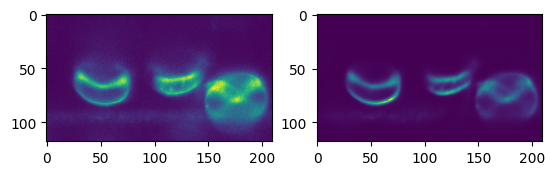

In [20]:
import matplotlib.pyplot as plt 

f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.squeeze(img.data)[40,...])
axarr[1].imshow(img_norm[40,...])


In [21]:
img_norm_gpu = rl.doRLDeconvolutionFromNpArrays(data_np = np.squeeze(img.data), 
                                 psf_np = psf_1, 
                                 niter= 10, 
                                 method = "gpu")

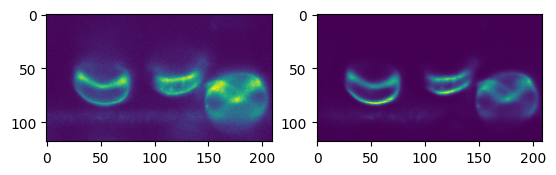

In [22]:
import matplotlib.pyplot as plt 

f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.squeeze(img.data)[40,...])
axarr[1].imshow(img_norm_gpu[40,...])


In [36]:
import napari 

viewer = napari.Viewer()
viewer.add_image(img.data)
viewer.add_image(img_norm)
viewer.add_image(img_norm_gpu)


c:\Users\deepu\Anaconda3\envs\napari_lattice\lib\site-packages\napari_tools_menu\__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'img_norm_gpu' at 0x1e2b13094c0>

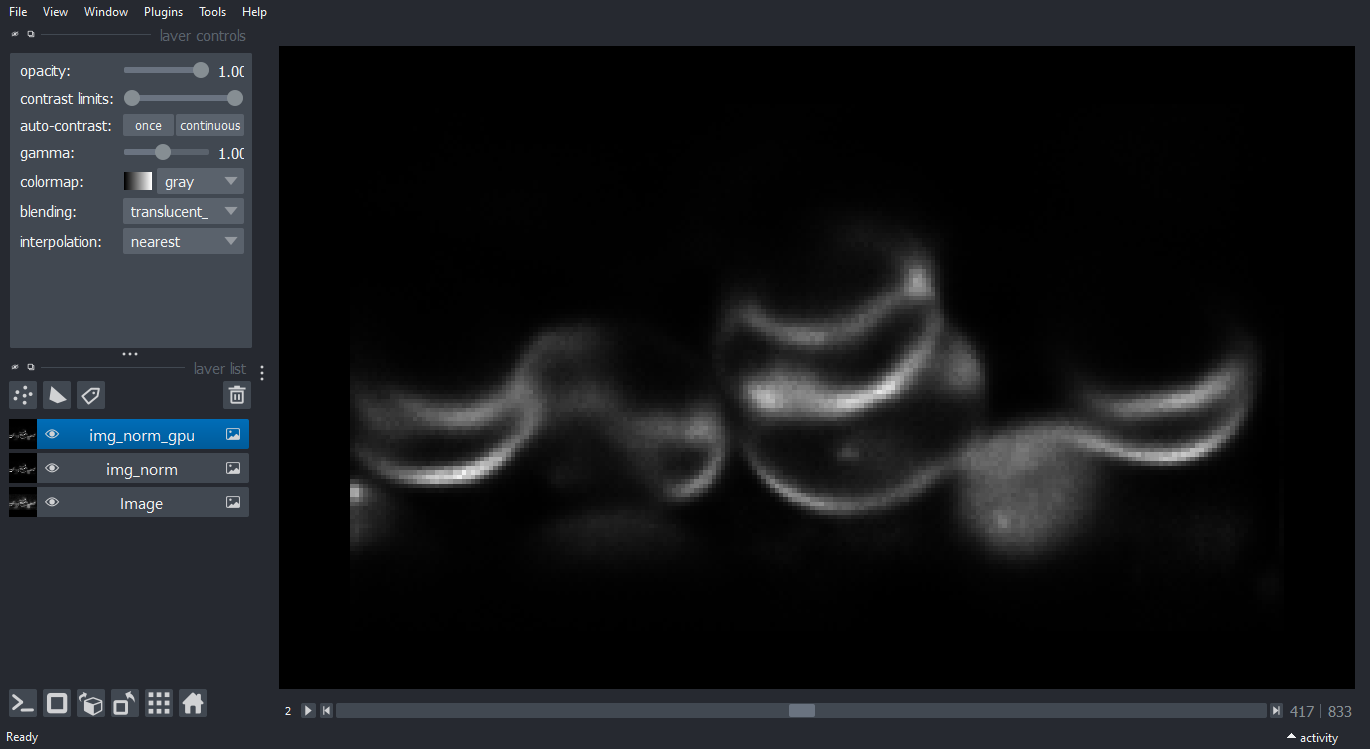

In [37]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

In [ ]:
#TRY THE RAPIDS CUDA based cucim library
#To try this you need to run pip install napari-lattice[cuda11decon]
#This will isntall cucim and cupy
# you need a CUDA 11 enabled GPU, Install cupy based on CUDA installation version

In [38]:
import reikna.cluda as cluda
api = cluda.ocl_api()
#code from test_reiknaFFT\reikna_getInfo.ipynb
devices = api.get_platforms()[0].get_devices()
print(f"OpenCL devices: {devices}")
for i in range(len(devices)):
    ocldevice = devices[i]
    print(f"Device {i}: {ocldevice}")
    print(f"max_work_group_size: {api.DeviceParameters(ocldevice).max_work_group_size}") # max_work_group_size: 1024
    print(f"max_work_item_sizes: {api.DeviceParameters(ocldevice).max_work_item_sizes}") # max_work_item_sizes: [1024, 1024, 64]
    print(f"max_num_groups: {api.DeviceParameters(ocldevice).max_num_groups}") # max_num_groups: [18446744073709551616, 18446744073709551616, 18446744073709551616]
    print(f"local_mem_size: {api.DeviceParameters(ocldevice).local_mem_size}") # local_mem_size: 49152
    print(f"local_mem_banks: {api.DeviceParameters(ocldevice).local_mem_banks}") # local_mem_banks: 32

OpenCL devices: [<pyopencl.Device 'NVIDIA GeForce MX150' on 'NVIDIA CUDA' at 0x1e2d944efc0>]
Device 0: <pyopencl.Device 'NVIDIA GeForce MX150' on 'NVIDIA CUDA' at 0x1e2d944efc0>
max_work_group_size: 1024
max_work_item_sizes: [1024, 1024, 64]
max_num_groups: [18446744073709551616, 18446744073709551616, 18446744073709551616]
local_mem_size: 49152
local_mem_banks: 32
